In [1]:
import h5py
import ast
from astropy.table import QTable, Table, Column, vstack
import astropy.units as u
import astropy
%matplotlib inline
%matplotlib notebook
import pandas as pd
import numpy as np
import simsurvey
import simsurvey_tools as sst
import matplotlib.pylab as plt
import pandas as pd
import os
from ZTF_hdf5 import Write_LightCurve, Read_LightCurve, Plot_LightCurve

In [31]:
home_dir = os.environ.get('HOME')
sfd98_dir = os.path.join(home_dir, 'data/sfd98')
sfd98_dir = '/Users/manon/ZTF/data/sfd98'

fields = sst.load_ztf_fields()
#sst.load_ztf_filters()
ccds = sst.load_ztf_ccds(filename='data/ZTF_corners_rcid.txt', num_segs=64) #it's rcid
#ccds = sst.load_ztf_ccds() #its' ccd

obs = pd.read_csv('data/2018_all_logs_from_dr1_rcid_zp_from_masci.csv')
obs[obs['rcid']==26]
obs['field'] =obs['field'].astype('int64')
obs['time'] = obs['time'] - 2400000.5

plan = simsurvey.SurveyPlan(time=obs['time'], band=obs['band'], zp=obs['zp'], obs_field=obs['field'], obs_ccd=obs['rcid'],
                            skynoise=obs['skynoise'], fields={k: v for k, v in fields.items() if k in 
                            ['ra', 'dec', 'field_id', 'width', 'height']}, ccds=ccds)

z_range = (0.01, 0.1)
dec_range = (-30, 90)
mjd_range = (plan.cadence['time'].min()- 30, plan.cadence['time'].max() + 30) #
# we  put a ra range as well
ntransient = 400 # we can change the number of transientor the rate (by def  ntransient = len(redshifts))
seed = 70 #we can fix teh seed

tr = simsurvey.get_transient_generator(zrange=z_range, transient='Ia', template='salt2', dec_range=dec_range,
                                       mjd_range=mjd_range, sfd98_dir=sfd98_dir, ntransient=ntransient, seed=seed)

n_det = 10
survey = simsurvey.SimulSurvey(generator=tr, plan=plan, n_det=n_det)

lc_sn_default = survey.get_lightcurves(progress_bar=True, notebook=True) #simullc_func
print(len(lc_sn_default.lcs))

Determining field IDs for all objects


FloatProgress(value=0.0)


Generating lightcurves


FloatProgress(value=0.0)

/Users/manon/ZTF/simsurvey/simsurvey/simulsurvey.py:1575: RuntimeWarning: invalid value encountered in true_divide
  mask_det = lc['flux']/lc['fluxerr'] > thr
/Users/manon/ZTF/simsurvey/simsurvey/simulsurvey.py:1575: RuntimeWarning: invalid value encountered in true_divide
  mask_det = lc['flux']/lc['fluxerr'] > thr
/Users/manon/ZTF/simsurvey/simsurvey/simulsurvey.py:1575: RuntimeWarning: invalid value encountered in true_divide
  mask_det = lc['flux']/lc['fluxerr'] > thr
/Users/manon/ZTF/simsurvey/simsurvey/simulsurvey.py:1575: RuntimeWarning: invalid value encountered in true_divide
  mask_det = lc['flux']/lc['fluxerr'] > thr
/Users/manon/ZTF/simsurvey/simsurvey/simulsurvey.py:1575: RuntimeWarning: invalid value encountered in true_divide
  mask_det = lc['flux']/lc['fluxerr'] > thr
/Users/manon/ZTF/simsurvey/simsurvey/simulsurvey.py:1575: RuntimeWarning: invalid value encountered in true_divide
  mask_det = lc['flux']/lc['fluxerr'] > thr
/Users/manon/ZTF/simsurvey/simsurvey/simulsurv


164


In [32]:
clas = Write_LightCurve()
data = clas.write_data('Data', lc_sn_default)
meta = clas.write_meta()
meta

lc is not an astropy.table.table.Table type <class 'simsurvey.simulsurvey.LightcurveCollection'>
OrderedDict([('directory', '/Users/manon/dataLC/Meta.hdf5'), ('file_name', 'Meta.dhf5')])


In [33]:
clas2 = Read_LightCurve(file_name='Data.hdf5')
read_data = clas2.Read_file(path='SN_1')
read_data

time,band,flux,fluxerr,zp,zpsys,field,ccd,comment
float64,str4,float64,float64,float64,str2,int64,int64,str1
58357.45262729982,ztfr,35.994779447362454,33.65348122140928,26.325,ab,699,27,
58357.509120400064,ztfr,77.0495550021462,38.63936634033848,26.325,ab,699,27,
58360.444618099835,ztfg,-78.11968776476559,72.28197252792263,26.275,ab,699,27,
58360.49760420015,ztfr,40.71458719779659,55.33883290823026,26.325,ab,699,27,
58363.40685189981,ztfg,-6.685481327730212,41.97879767247049,26.275,ab,699,27,
58363.489062500186,ztfr,-11.214200423883893,34.279146150168536,26.325,ab,699,27,
58366.38287039986,ztfr,-4.020349129940301,20.65522811522796,26.325,ab,699,27,
58366.42452549981,ztfg,2.557009779689373,15.524942332573806,26.275,ab,699,27,
58366.520439799875,ztfr,2.642876446794863,27.735116577437797,26.325,ab,699,27,


In [34]:
import csv
from astropy.table import Table
home_dir = os.environ.get('HOME')
folder_dir = os.path.join(home_dir, 'dataLC/selection_tab.csv')
folder_dir_seuil = os.path.join(home_dir, 'dataLC/seuil_name_selec.csv')

table = Table.read(folder_dir) #Lecture du fichier csv
table_2 = Table.read(folder_dir_seuil) #Lecture du fichier csv

In [35]:
print(table,'\n\n', table_2)

 col  lim_col type     op1    
----- ------- ---- -----------
phase       0  int operator.le
phase       0  int operator.ge
phase     -10  int operator.le
phase      20  int operator.ge
 band    ztfr  str operator.eq
 band    ztfg  str operator.eq
 band    ztfi  str operator.eq 

 seuil  name_selec 
----- ------------
    4   nb_phase<0
   10   nb_phase>0
    1 nb_phase<-10
    1  nb_phase>20
    0 nb_band_ztfr
    0 nb_band_ztfg
    0 nb_band_ztfi


In [36]:
import operator
def selec_phase(Tab, csvFile, limSNR, selec=False, Verbose=False, Plot=False):
    
    SNR = Tab['flux'] / Tab['fluxerr']
    phase = (Tab['time'] - Tab.meta['t0']) / (1-Tab.meta['z'])
    Tab.add_columns([SNR, phase], names=['SNR', 'phase'])
    mask_SNR = Tab['SNR'] >= limSNR
    Tab = Tab[mask_SNR]
    len_tab = []
    
    for i, cols in enumerate(csvFile):
        if cols['col'] not in Tab.colnames:
            print(cols['col'], 'This column doesnt exist') 
    
        else:
            col = cols['col']
            op = eval(cols['op1'])
            type_ = eval(cols['type'])
            lim = type_(cols['lim_col'])
    
            mask = op(Tab[col], lim)
            new_Tab = Tab[mask]
        
            len_tab.append(len(new_Tab))
            
    if Verbose:
        print('min :', np.min(Tab['phase']), 'max :', np.max(Tab['phase']))
    if Plot:
        x = Tab['phase']
        y = Tab['flux']

        fig, axs = plt.subplots(1, 1, figsize=(10,8))
        axs.plot(x,y,marker = '*')
            
    if selec:
        return Tab
    else:
        return len_tab

In [37]:
selec_phase(lc_sn_default[0], table, 5)

[2, 55, 2, 44, 37, 20, 0]

In [38]:
clas_meta = Read_LightCurve(file_name='Meta.hdf5')
read_meta = clas_meta.Read_file(path='meta')

rtot = []
r = []
rb = table_2['name_selec']   
for i, row in enumerate(read_meta):
    len_Tab = selec_phase(lc_sn_default[i], table, 5)
    r.append(len_Tab)

rtot = np.array(r)

for i in range(0, len(rtot[0])):
    line = [row[i] for row in rtot]
    c = Column(line)
    read_meta.add_column(c, name=rb[i])
    read_meta = read_meta
    
read_meta

/var/folders/8n/j9hb298x4xq39l_vtv55kkp00000gp/T/ipykernel_61374/1317654429.py:4: RuntimeWarning: invalid value encountered in true_divide
  SNR = Tab['flux'] / Tab['fluxerr']


z,t0,x0,x1,c,mwebv,ra,dec,mwebv_sfd98,idx_orig,path,nb_phase<0,nb_phase>0,nb_phase<-10,nb_phase>20,nb_band_ztfr,nb_band_ztfg,nb_band_ztfi
float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,str6,int64,int64,int64,int64,int64,int64,int64
0.09746273114426751,58407.90806173295,0.00047468537813534706,0.19833944767990092,-0.042646540093759566,-0.003205377481213866,156.3079631600125,61.111171944625845,0.00785993909003516,0,SN_0,2,55,2,44,37,20,0
0.08329532832943781,58393.60492859696,0.00044119515560127955,-1.0166971159415237,0.01006378739326793,0.09028016645562469,45.86872492097942,38.779725753393265,0.09098903483028242,2,SN_1,13,7,4,5,11,9,0
0.06768985090609805,58381.204806498245,0.0011871555696590353,1.4857847777405575,-0.09292322209647252,0.019306778896361548,134.07827370932642,47.51335691565907,0.021847396430278145,4,SN_2,13,85,5,56,54,44,0
0.07636610797218073,58357.463765820234,0.0006729751910845871,1.0520605973166228,0.04112074665861659,0.014421558635036556,222.56002030253694,42.92725103278716,0.015473352590553196,9,SN_3,46,15,8,4,38,15,8
0.0708829178829646,58215.6354841203,0.0007946761805729734,0.4373220243334564,0.009443052660104407,0.017087432691125965,131.3752304554827,77.95321468822638,0.01877705483646168,10,SN_4,3,17,0,7,11,9,0
0.06719229280005781,58214.35712866831,0.0015128732464817106,-0.17892598972164447,-0.1617020486041254,0.03170008818398081,213.89582766301066,1.2918863196149613,0.032226222813906996,13,SN_5,8,25,3,14,17,16,0
0.0889024536282744,58270.41401387781,0.0008801695225736099,0.6605021226541699,-0.21008024801774206,0.05408941489817804,199.86596411855,-11.383496725289506,0.046092933750669814,15,SN_6,2,12,0,4,7,7,0
0.05647814437682584,58407.882540398736,0.0010749448287944753,0.12211959655844497,0.06557400347680235,0.022237106669327173,171.81613759200434,24.87782631126945,0.015611156855000433,16,SN_7,0,29,0,26,17,12,0
0.04963981168196111,58394.68065356194,0.002672589860572418,0.2291908599923122,-0.17691376448127316,0.07770020716744763,344.2559566075466,18.45721228469108,0.07704780188757195,19,SN_8,16,13,10,11,12,17,0


In [39]:
def selec(list_lenTable, csvFile):
    
    res = 1
    len_table = []
    
    for i, len_selec in enumerate(list_lenTable):
        if res:
            res &= operator.ge(len_selec, csvFile['seuil'][i])
        if not res:
            break
            
    return res

In [40]:
R, sel_list = [], []

for i, path in enumerate(read_meta['path']):
    class_data = Read_LightCurve(file_name='Data.hdf5')
    lc = class_data.Read_file(path=path)
    lc_len = selec_phase(lc, table, 5, selec=False)
    sel = selec(lc_len, table_2)
    R.append(sel)

pass_selec = Column(R)

if 'pass selec' in read_meta.colnames:
    read_meta['pass selec'] = pass_selec
else :
    read_meta.add_column(pass_selec, name = 'pass selec')
    
read_meta

/var/folders/8n/j9hb298x4xq39l_vtv55kkp00000gp/T/ipykernel_61374/1317654429.py:4: RuntimeWarning: invalid value encountered in true_divide
  SNR = Tab['flux'] / Tab['fluxerr']


z,t0,x0,x1,c,mwebv,ra,dec,mwebv_sfd98,idx_orig,path,nb_phase<0,nb_phase>0,nb_phase<-10,nb_phase>20,nb_band_ztfr,nb_band_ztfg,nb_band_ztfi,pass selec
float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,str6,int64,int64,int64,int64,int64,int64,int64,int64
0.09746273114426751,58407.90806173295,0.00047468537813534706,0.19833944767990092,-0.042646540093759566,-0.003205377481213866,156.3079631600125,61.111171944625845,0.00785993909003516,0,SN_0,2,55,2,44,37,20,0,0
0.08329532832943781,58393.60492859696,0.00044119515560127955,-1.0166971159415237,0.01006378739326793,0.09028016645562469,45.86872492097942,38.779725753393265,0.09098903483028242,2,SN_1,13,7,4,5,11,9,0,0
0.06768985090609805,58381.204806498245,0.0011871555696590353,1.4857847777405575,-0.09292322209647252,0.019306778896361548,134.07827370932642,47.51335691565907,0.021847396430278145,4,SN_2,13,85,5,56,54,44,0,1
0.07636610797218073,58357.463765820234,0.0006729751910845871,1.0520605973166228,0.04112074665861659,0.014421558635036556,222.56002030253694,42.92725103278716,0.015473352590553196,9,SN_3,46,15,8,4,38,15,8,1
0.0708829178829646,58215.6354841203,0.0007946761805729734,0.4373220243334564,0.009443052660104407,0.017087432691125965,131.3752304554827,77.95321468822638,0.01877705483646168,10,SN_4,3,17,0,7,11,9,0,0
0.06719229280005781,58214.35712866831,0.0015128732464817106,-0.17892598972164447,-0.1617020486041254,0.03170008818398081,213.89582766301066,1.2918863196149613,0.032226222813906996,13,SN_5,8,25,3,14,17,16,0,1
0.0889024536282744,58270.41401387781,0.0008801695225736099,0.6605021226541699,-0.21008024801774206,0.05408941489817804,199.86596411855,-11.383496725289506,0.046092933750669814,15,SN_6,2,12,0,4,7,7,0,0
0.05647814437682584,58407.882540398736,0.0010749448287944753,0.12211959655844497,0.06557400347680235,0.022237106669327173,171.81613759200434,24.87782631126945,0.015611156855000433,16,SN_7,0,29,0,26,17,12,0,0
0.04963981168196111,58394.68065356194,0.002672589860572418,0.2291908599923122,-0.17691376448127316,0.07770020716744763,344.2559566075466,18.45721228469108,0.07704780188757195,19,SN_8,16,13,10,11,12,17,0,1


In [41]:
import sncosmo
import iminuit
import colorama
from colorama import Fore
from colorama import Style

def SN_fit(lc_selec, Plot=False, Verbose=False):
    table_rows = []
    keys = []

    for i, row in enumerate(lc_selec):
        path = row['path']
        data = Read_LightCurve(file_name='Data.hdf5')
        lc = data.Read_file(path=path)
    
        # create a model
        model = sncosmo.Model(source='salt2')
        # run the fit
        try:
            result, fitted_model = sncosmo.fit_lc(
                lc, model,
                ['z', 't0', 'x0', 'x1', 'c'],  # parameters of model to vary
                bounds={'z':(0.3, 0.7)})  # bounds on parameters (if any)
            table_rows.append(result.parameters)
            keys.append(path)
        
            if Plot:
                sncosmo.plot_lc(lc, model=fitted_model, errors=result.errors)
                
            if Verbose:
                print("Number of chi^2 function calls:", result.ncall)
                print("Number of degrees of freedom in fit:", result.ndof)
                print("chi^2 value at minimum:", result.chisq)
                print("model parameters:", result.param_names)
                print("best-fit values:", result.parameters)
                print("The result contains the following attributes:\n", result.keys())
                print("Errors corresponding to the different fitting parameters:\n", result.errors)
                print('result.success: \n', result.success)
                print('result.message: \n', result.message)
                print('result.vparam_names: \n', result.vparam_names)
                print('Matrice de covariance : \n', result.covariance)
                print('result.nfit: \n', result.nfit)
                print('result.data_mask: \n', result.data_mask)
        
        except:
            print("WARNING : That was no valid light curve.")
            
    return result.param_names, table_rows, keys

In [42]:
mask_pass_selec = read_meta['pass selec'] == 1
read_meta_test = read_meta[mask_pass_selec]

param = SN_fit(read_meta_test)

c = Column(param[2], name='path')
tab_param = Table(rows=param[1], names=param[0])
tab_param.add_column(c, index=0) 
tab_param

/Users/manon/opt/anaconda3/lib/python3.9/site-packages/sncosmo/models.py:813: RuntimeWarning: overflow encountered in power
  10. ** (-0.4 * self._colorlaw(wave) * self._parameters[2]))
/Users/manon/opt/anaconda3/lib/python3.9/site-packages/sncosmo/models.py:812: RuntimeWarning: invalid value encountered in multiply
  return (self._parameters[0] * (m0 + self._parameters[1] * m1) *
/Users/manon/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:87: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


/Users/manon/opt/anaconda3/lib/python3.9/site-packages/sncosmo/fitting.py:235: RuntimeWarning: invalid value encountered in true_divide
  significant_data = data[(data.flux / data.fluxerr) > minsnr]


path,z,t0,x0,x1,c
str6,float64,float64,float64,float64,float64
SN_2,0.6216224010029158,58386.95493674753,0.0005365110039406001,0.6390065786049136,-0.4591576858699412
SN_3,0.3000000035947774,58358.911823000046,0.0005811925792708799,0.26108104012452066,-0.2442797245746818
SN_5,0.5842188135626969,58220.563796632385,0.0005864510980196576,0.26345532063511523,-0.4976403802564805
SN_8,0.3000000005523969,58398.34571027754,0.0015821319919223987,0.8313215070184525,-0.35118517099416924
SN_13,0.30000003115124985,58270.94030444877,0.000341648236654718,0.6257183991088694,-0.07176107273423675
SN_22,0.300000002749646,58238.38846641108,0.00042982846347397257,0.7924486791495059,-0.27759317958883406
SN_23,0.6186010631276991,58347.56423065675,0.0006362133571920949,0.3337215233740182,-0.43962817620973876
SN_26,0.3000000006700775,58334.33366048208,0.0002948312979977501,-1.9678740221347208,0.012217530833561693
SN_27,0.30000000593361226,58365.524273073956,0.00021979833188550543,-0.9253907050653768,0.10506507200728599


<IPython.core.display.Javascript object>


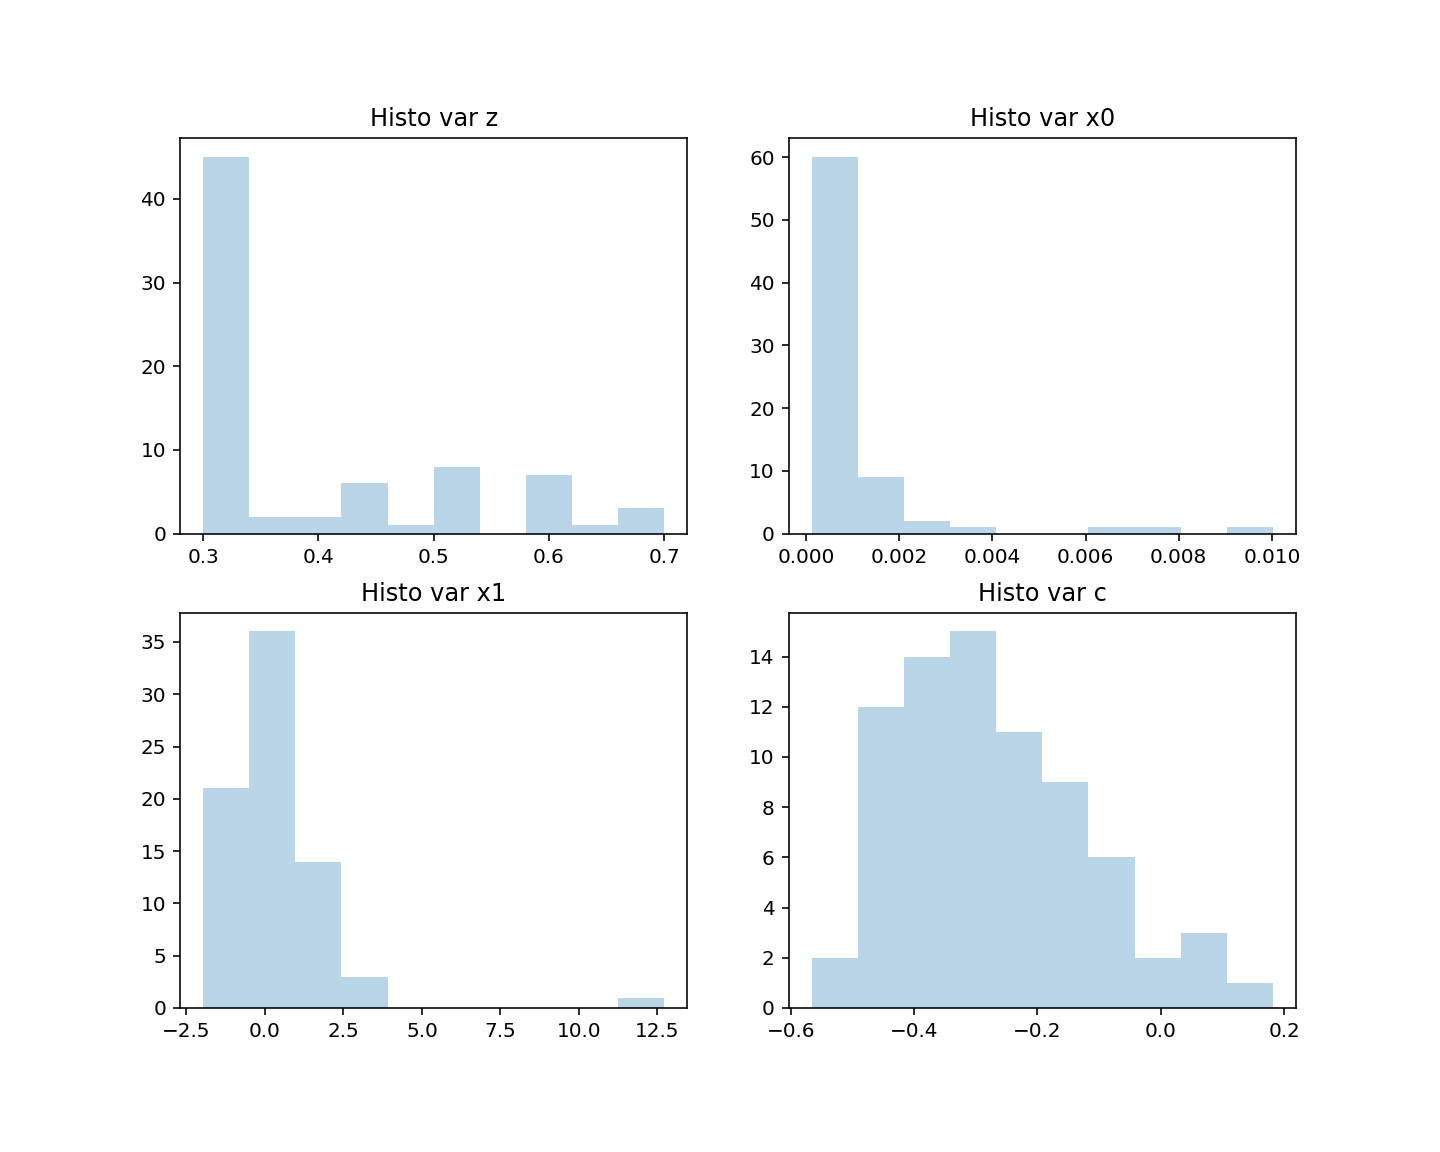

In [49]:
var = ['z', 'x0', 'x1', 'c']
dico = dict(zip(var, [(0,0), (0,1), (1,0), (1,1)]))

fig, axs = plt.subplots(2, 2, figsize=(10,8))
for variables in var :
    ipos = dico[variables][0]
    jpos = dico[variables][1]
        
    axs[ipos, jpos].hist(tab_param[variables], alpha = 0.3)
    axs[ipos, jpos].set_title('Histo var {}'.format(variables))